In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment

In [2]:
plt.rcParams['font.family'] = 'CMU Sans Serif'
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['text.color'] = '#000000'
#plt.rcParams['axes.edgecolor'] = '#000000'
#vrcParams['xtick.color'] = '#000000'
#plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = '#000000'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.framealpha'] = 0.75
plt.rcParams['patch.linewidth'] = 0

In [3]:
def plot_weight_histogram(weights, ylim=None, figsize=(6,2), filename='histogram'):
    plt.figure(figsize=figsize)
    plt.hist(wgts, bins=np.max(weights))
    plt.xlim((0,50))
    plt.ylim(ylim)
    plt.xlabel('weight')
    plt.ylabel('frequency')
    plt.savefig('plots/thesis/'+filename+'.pdf')
    pl = plt.show()
    
def plot_weigt_mean(weights_assembly, filename='weight_mean'):
    y = np.mean(weights_assembly, axis=(0,2,3))
    yerr = np.std(np.mean(weights_assembly, axis=(2,3)), axis=0)
    
    plt.figure(figsize=(6,3))
    plt.plot(y, marker='.')
    plt.fill_between(np.arange(len(y)), y-yerr, y+yerr, alpha=0.3)
    plt.ylim((0, 0.8))
    plt.xlabel('trials')
    plt.ylabel('mean weight')
    plt.savefig('plots/thesis/'+filename+'.pdf')
    pl = plt.show()

def plot_weight_matrix(weights, vmin=0, vmax=20, filename='weight_matrix'):
    #plt.imshow(weights, origin='lower', vmin=vmin, vmax=vmax, cmap='binary')
    plt.imshow(weights, origin='lower', vmin=vmin, vmax=vmax, cmap='Blues_r')
    cb = plt.colorbar()
    cb.set_ticks(np.arange(vmin,vmax+1,5))
    cb.set_label('weight')
    plt.savefig('plots/thesis/'+filename+'.pdf')
    pl = plt.show()

In [4]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 9,  # Random seed
    'trials': 50, #20,  # Number of trials
    'stepsPerTrial': 40, #40, #50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35, #40, #35 # Number of connections per neuron
    # Noise
    'isNoise': True,
    'onlyExcitatory': True,  # Noisy input is only excitatory
    'noiseMaxWeight': 120, #120,
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100, #100 # Voltage time constant
    'currentTau': 6, #5 # Current time constant
    'thresholdMant': 1000, #1200,  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningEpoch': 4,
    'learningRule': '2^-4*x1*y1*x0*y0 - 2^-3*y0*w*w',
    # Input
    'inputIsAlternating': True,
    'inputAlternatingNum': 1,
    'inputOffset': 20, #10,
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 30, #20, #30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [5]:
srs = []

for i in range(10):
    # Set seed
    parameters['seed'] = i
    
    # Initilizes the experiment and utils
    exp = AssemblyExperiment(name='assemblies', parameters=parameters)
    utils = Utils.instance()

    # Build network
    exp.build()

    # Get spectral radius
    sr = utils.getSpectralRadius(exp.net.initialWeights)
    srs.append(sr)
    
srs = np.array(srs)

In [6]:
print('mean', np.mean(srs), 'std', np.std(srs))

mean 0.8947896857444088 std 0.03888217012308209


In [7]:
trials1 = 50
trials2 = 50
seeds = np.arange(10)

weights_assembly_1 = []
weights_assembly_2 = []

for seed in seeds:
    d = np.load('data/assemblies/weights_seed-'+str(seed)+'.npz', allow_pickle=True)
    
    tmp_1 = [ d['initial'].item().toarray() ]
    tmp_2 = [ d['train1'][-1].toarray() ]
    
    for i in range(trials1):
        tmp_1.append(d['train1'][i].toarray())
    for i in range(trials2):
        tmp_2.append(d['train2'][i].toarray())
        
    weights_assembly_1.append(tmp_1)
    weights_assembly_2.append(tmp_2)

weights_assembly_1 = np.array(weights_assembly_1)
weights_assembly_2 = np.array(weights_assembly_2)

In [8]:
print(weights_assembly_1.shape)
print(weights_assembly_2.shape)

(10, 51, 400, 400)
(10, 51, 400, 400)


In [9]:
inp_size = 40

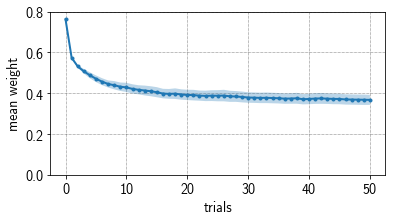

In [10]:
plot_weigt_mean(weights_assembly_1, filename='weight_mean_train1')

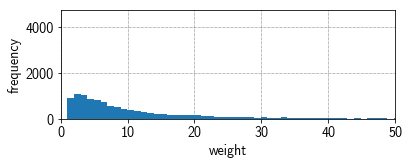

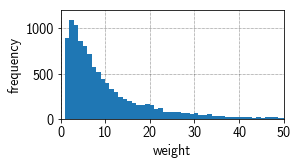

In [40]:
wgts = weights_assembly_1[0,0]
wgts = wgts[np.nonzero(wgts)]

plot_weight_histogram(wgts, ylim=(0,4750), filename='histogram_train1_before')
plot_weight_histogram(wgts, ylim=(0,1200), figsize=(4,2), filename='histogram_train1_before_inlay')

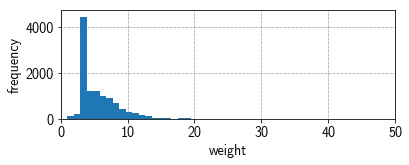

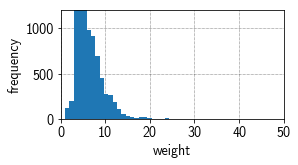

In [39]:
wgts = weights_assembly_1[0,-1]
wgts = wgts[np.nonzero(wgts)]

plot_weight_histogram(wgts, ylim=(0,4750), filename='histogram_train1_after')
plot_weight_histogram(wgts, ylim=(0,1200), figsize=(4,2), filename='histogram_train1_after_inlay')

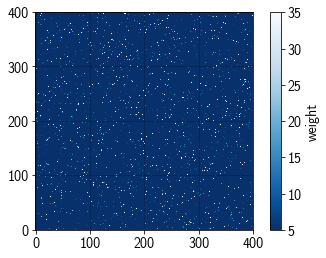

In [13]:
plot_weight_matrix(weights_assembly_1[0,0], vmin=5, vmax=35, filename='weight_matrix_train1_before')

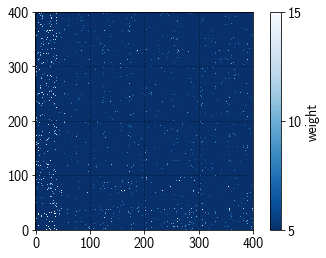

In [14]:
plot_weight_matrix(weights_assembly_1[0,-1], vmin=5, vmax=15, filename='weight_matrix_train1_after')

In [15]:
cluster1_means = np.mean(weights_assembly_1[:,:,:inp_size,:inp_size], axis=(2,3))
all1_means = np.mean(weights_assembly_1, axis=(2,3))

cluster1_mean = np.mean(cluster1_means, axis=0)
all1_mean = np.mean(all1_means, axis=0)

cluster1_std = np.std(cluster1_means, axis=0)

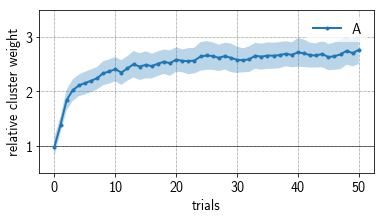

In [16]:
y = cluster1_mean/all1_mean
yerr = cluster1_std/all1_mean

plt.figure(figsize=(6,3))
plt.axhline(y=1, color='black', linewidth=0.5)
plt.plot(y, marker='.', label='A')
plt.fill_between(np.arange(trials1+1), y-yerr, y+yerr, alpha=0.3)
plt.ylim((0.5, 3.5))
plt.legend()
plt.xlabel('trials')
plt.ylabel('relative cluster weight')
plt.savefig('plots/thesis/cluster_weight_train1.pdf')
pl = plt.show()

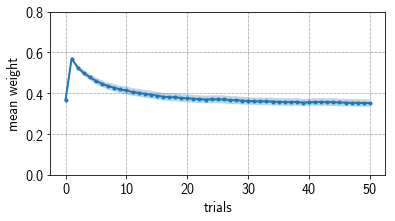

In [17]:
plot_weigt_mean(weights_assembly_2, filename='weight_mean_train2')

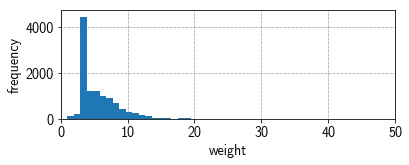

In [18]:
wgts = weights_assembly_2[0,0]
wgts = wgts[np.nonzero(wgts)]

plot_weight_histogram(wgts, ylim=(0,4750), filename='histogram_train2_before')

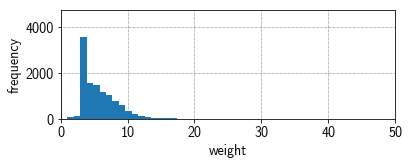

In [19]:
wgts = weights_assembly_2[0,-1]
wgts = wgts[np.nonzero(wgts)]

plot_weight_histogram(wgts, ylim=(0,4750), filename='histogram_train2_after')

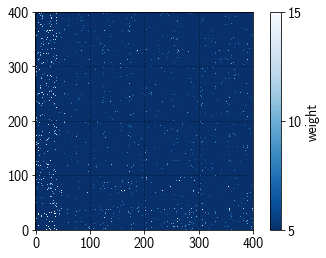

In [20]:
plot_weight_matrix(weights_assembly_2[0,0], vmin=5, vmax=15, filename='weight_matrix_train2_before')

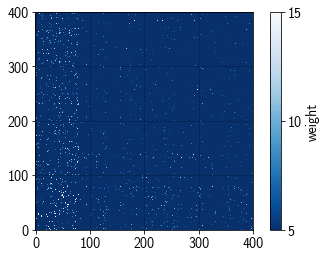

In [21]:
plot_weight_matrix(weights_assembly_2[0,-1], vmin=5, vmax=15, filename='weight_matrix_train2_after')

In [22]:
cluster2_means1 = np.mean(weights_assembly_2[:,:,:inp_size,:inp_size], axis=(2,3))
cluster2_means2 = np.mean(weights_assembly_2[:,:,inp_size:2*inp_size,inp_size:2*inp_size], axis=(2,3))
all2_means = np.mean(weights_assembly_2, axis=(2,3))

cluster2_mean1 = np.mean(cluster2_means1, axis=0)
cluster2_mean2 = np.mean(cluster2_means2, axis=0)
all2_mean = np.mean(all2_means, axis=0)

cluster2_std1 = np.std(cluster2_means1, axis=0)
cluster2_std2 = np.std(cluster2_means2, axis=0)

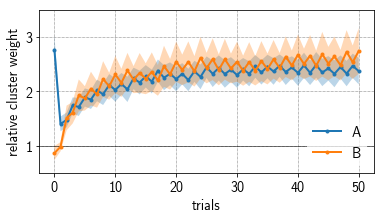

In [25]:
y1 = cluster2_mean1/all2_mean
y2 = cluster2_mean2/all2_mean
yerr1 = cluster2_std1/all2_mean
yerr2 = cluster2_std2/all2_mean

plt.figure(figsize=(6,3))
plt.axhline(y=1, color='black', linewidth=0.5)
plt.plot(y1, marker='.', label='A')
#plt.fill_between(np.arange(2*trials2+1), y1-yerr1, y1+yerr1, alpha=0.3)
plt.fill_between(np.arange(trials2+1), y1-yerr1, y1+yerr1, alpha=0.3)
plt.plot(y2, marker='.', label='B')
#plt.fill_between(np.arange(2*trials2+1), y2-yerr2, y2+yerr2, alpha=0.3)
plt.fill_between(np.arange(trials2+1), y2-yerr2, y2+yerr2, alpha=0.3)
plt.ylim((0.5, 3.5))
plt.legend()
plt.xlabel('trials')
plt.ylabel('relative cluster weight')
plt.savefig('plots/thesis/cluster_weight_train2.pdf')
pl = plt.show()